# MIE1624 Group Project Pt.2

## Topic: Facilitating Canada's Innovation Ecosystem: Focus on Key Driving Sectors


### Notes before running the code:

*   Make sure to upload the files in the correct path.
*   Make sure to add a chatGPT API and a Webscraping API before running


## Summary

### In Pt.1 we did:

evaluations on Canada's global standing on innovation and identifies three main sectors that are the potential driving force for Canada's innovation ecosystems, with analysis on its strength and weakness by each sector.

The three main sectors are:

* Information and Culture Industries

* Professional Scientific and Technical Services

* Manufacturing


### Next, in Pt.2, we will:

analyze how other countries, such as

* Sweden, one of the top 3 innovative country, and

* US, the top country on innovation

for each sectors, to give us a better insights on how to improve Canada's current innovation strategies on each key sector.

# 1 . Compare Canada and Sweden's innovation expenditure in 2022

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Canada's average total innovation activities in 2022

Data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3310018501

In [57]:
# file_path = r'Part1 data/Canada/Average expenditures on innovation activities, by industry and enterprise size.csv'

file_path = r'Average expenditures on innovation activities, by industry and enterprise size.csv'

canada_data = pd.read_csv(file_path)

canada_data.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Enterprise size,Expenditures on innovation activities,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017,Canada,2021A000011124,"Total, all surveyed industries","Total, all enterprise sizes",Total innovation expenditures,Dollars,81,thousands,3,v1064461219,1.1.1.1,1372.0,B,NaN,NaN,0
1,2019,Canada,2021A000011124,"Total, all surveyed industries","Total, all enterprise sizes",Total innovation expenditures,Dollars,81,thousands,3,v1064461219,1.1.1.1,1467.0,B,NaN,NaN,0
2,2022,Canada,2021A000011124,"Total, all surveyed industries","Total, all enterprise sizes",Total innovation expenditures,Dollars,81,thousands,3,v1064461219,1.1.1.1,2146.0,C,NaN,NaN,0
3,2017,Canada,2021A000011124,"Total, all surveyed industries","Total, all enterprise sizes","Research and experimental development (R&D), b...",Dollars,81,thousands,3,v1064461220,1.1.1.2,1011.0,B,NaN,NaN,0
4,2019,Canada,2021A000011124,"Total, all surveyed industries","Total, all enterprise sizes","Research and experimental development (R&D), b...",Dollars,81,thousands,3,v1064461220,1.1.1.2,1157.0,D,NaN,NaN,0


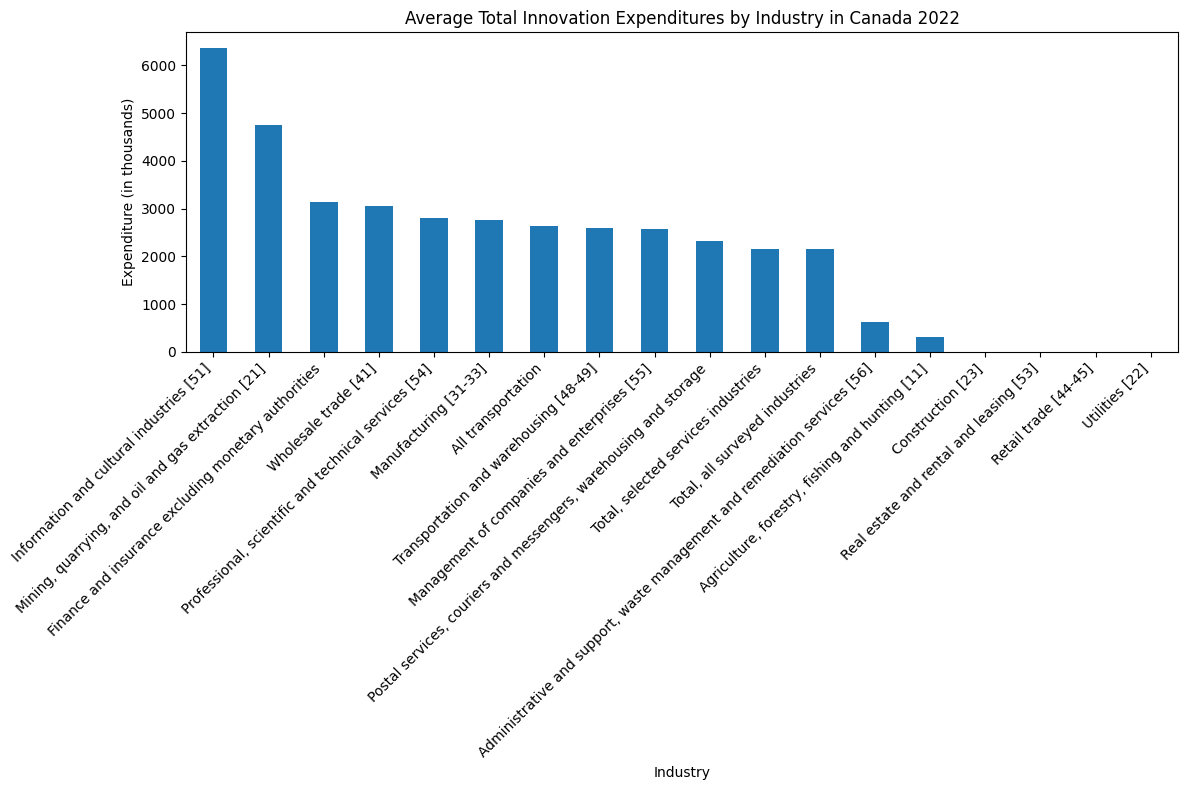

In [64]:
total_innovation = canada_data[
    canada_data['Expenditures on innovation activities'] == 'Total innovation expenditures'
]
total_innovation_2022 = total_innovation[total_innovation["REF_DATE"] == 2022]

industry_expenditures = total_innovation_2022.groupby(
    'North American Industry Classification System (NAICS)'
)['VALUE'].mean().sort_values(ascending=False)

# Plot the top industries by mean expenditure
plt.figure(figsize=(12, 8))
industry_expenditures.plot(kind='bar')
plt.title('Average Total Innovation Expenditures by Industry in Canada 2022')
plt.ylabel('Expenditure (in thousands)')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('C_exp_2022.png')
plt.show()

In [59]:
# Save as a plain text file
# Average Total Innovation Expenditures by Sectors in Canada 2022
# Saved in C_exp_2022.txt before

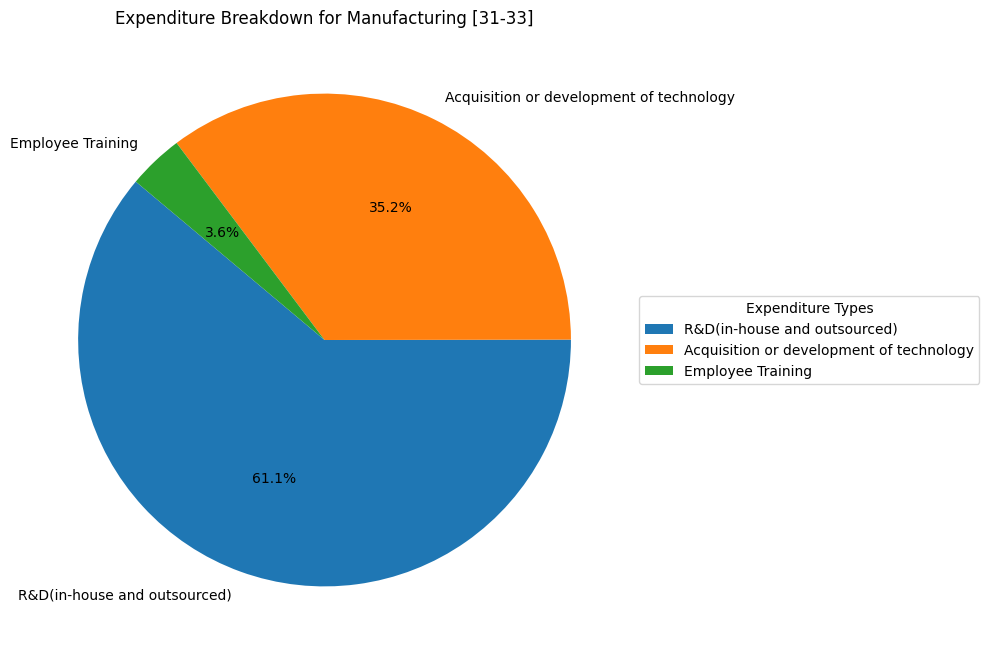

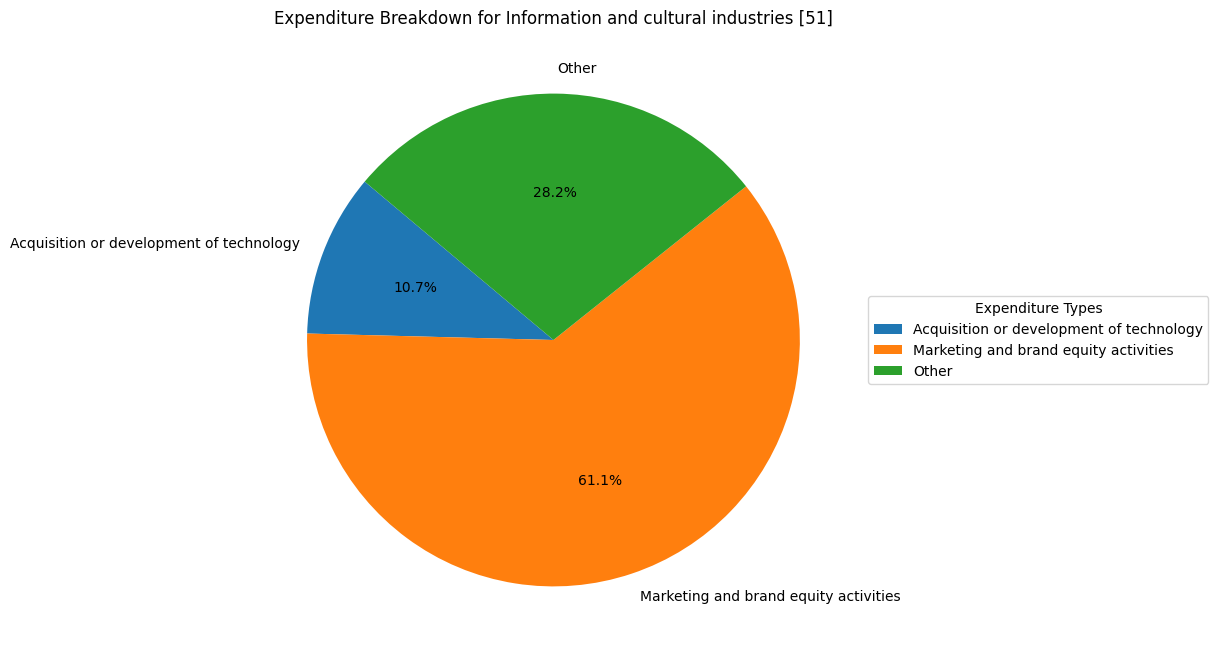

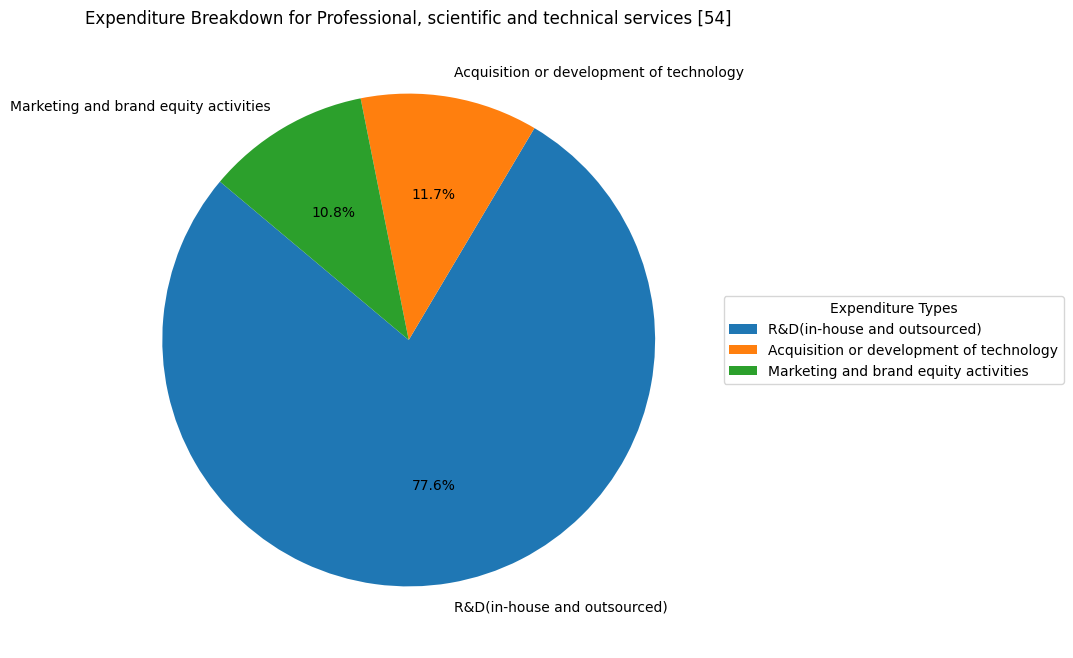

In [53]:
# Filter for the year 2022
data_2022 = canada_data[canada_data['REF_DATE'] == 2022]

# Define the sectors with exact names
updated_sectors = [
    'Information and cultural industries [51]',
    'Professional, scientific and technical services [54]',
    'Manufacturing [31-33]'
]

# Filter for the specified sectors
data_2022_filtered = data_2022[
    data_2022['North American Industry Classification System (NAICS)'].isin(updated_sectors)
]

# Exclude total expenditures
data_2022_filtered = data_2022_filtered[
    ~data_2022_filtered['Expenditures on innovation activities'].str.contains("Total", case=False, na=False)
]

# Drop rows with NaN in the VALUE column
data_2022_filtered = data_2022_filtered.dropna(subset=['VALUE'])

# Create a mapping of long names to shorter names
short_names = {
    'Research and experimental development (R&D), both in-house and outsourced (contracted out or granted), to other organizations': 'R&D(in-house and outsourced)',
    'Acquisition or development of advanced technology': 'Acquisition or development of technology',
    'Employee training specifically for innovation projects': 'Employee Training',
    'Marketing and brand equity  activities linked to the introduction of new goods, services or business processes': 'Marketing and brand equity activities',
    'Other innovation activities': 'Other'
}

# Map shorter names to the column
data_2022_filtered['Short Names'] = data_2022_filtered['Expenditures on innovation activities'].map(short_names)

# Select relevant columns
columns_to_display = [
    'REF_DATE', 'North American Industry Classification System (NAICS)',
    'Short Names', 'VALUE'
]
filtered_data = data_2022_filtered[columns_to_display]

# Plot a pie chart for each sector
sectors = filtered_data['North American Industry Classification System (NAICS)'].unique()

for sector in sectors:
    sector_data = filtered_data[filtered_data['North American Industry Classification System (NAICS)'] == sector]
    labels = sector_data['Short Names']
    values = sector_data['VALUE']

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

    # Add title with bold and larger font
    plt.title(f"Canada's Expenditure Breakdown for {sector} (2022)")

    # Add legend with shorter names
    plt.legend(wedges, labels, title="Expenditure Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()


In [61]:
# Average Total Innovation Expenditures for Key Sectors in Canada 2022
df = sector_data.copy()
with open('C_exp_sector_2022.txt', 'w') as f:
    f.write(df.to_string(index=False))

## Canada's average innovation expenditure in 2022 for key sectors

## Sweden's Average Total Innovation Expenditures in 2022

Data: https://www.statistikdatabasen.scb.se/pxweb/en/ssd/START__UF__UF0315__UF0315H/ForetagUtgInnovoAkt/

The Statistics Sweden only shows the innovation expenditure by industries. We mapped the sectors based on Canada's sector category for the dataset.

In [3]:
file_path = 'Sweden_innovation_expenditure_20202022.csv'
data = pd.read_csv(file_path)

data.head()

,Sector_Group,Capital Goods (excl. R&D),Contracted-out R&D,In-house R&D,Other Expenditure (excl. R&D),Other Innovation Activities (excl. R&D),Personnel Costs (excl. R&D),"Services, Materials, Supplies (excl. R&D)",Total_Sector_Innovation_Expenditure
0,"Administrative and support, waste management a...",85.0,55.0,589.0,262.0,1938.0,1321.0,270.0,4520.0
1,All transportation,306.0,87.0,193.0,20.0,899.0,491.0,82.0,2078.0
2,Construction,631.0,0.0,0.0,202.0,3201.0,2102.0,266.0,6402.0
3,Finance and insurance excluding monetary autho...,304.0,1301.0,3457.0,458.0,9545.0,6307.0,2474.0,23846.0
4,Information and cultural industries,1437.0,533.0,75341.0,1679.0,18775.0,12551.0,2747.0,113063.0


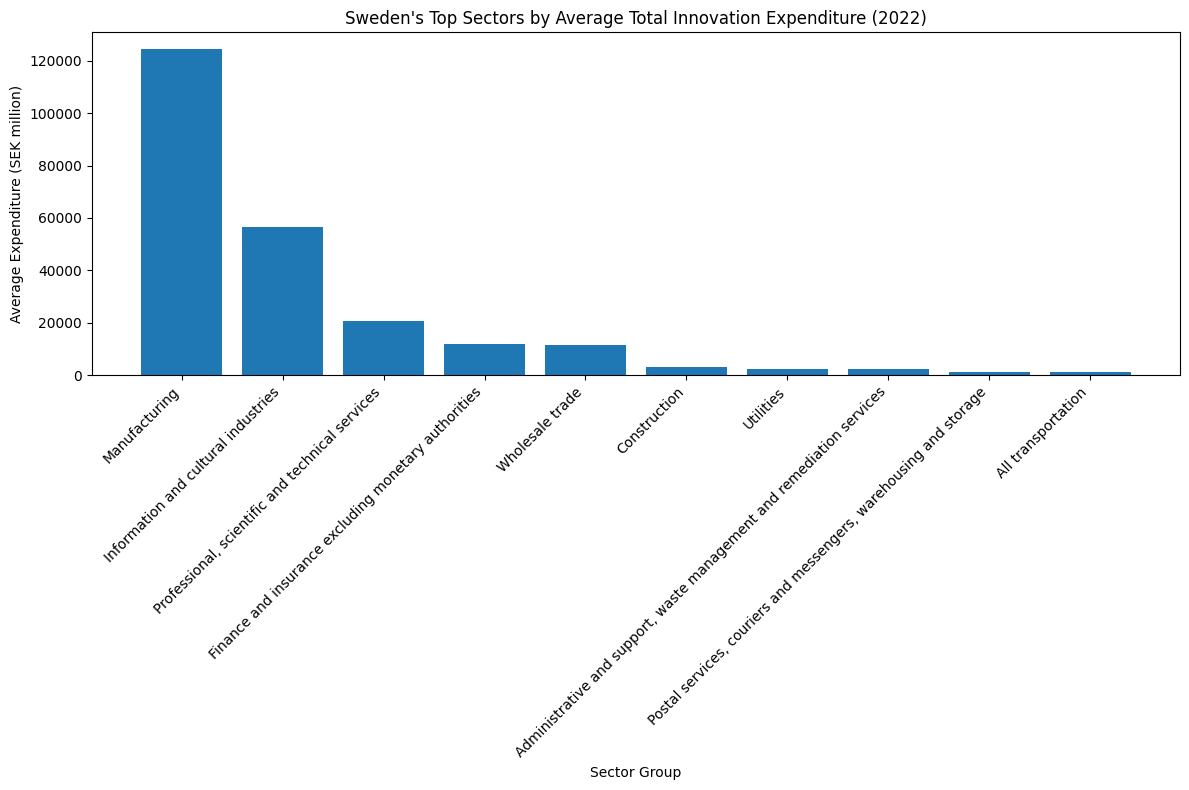

In [9]:
# 1. The Sweden's top sectors by total innovation expenditure in 2022

# Adjust dataset to calculate average annual expenditure
data_avg_2022 = data.copy()
data_avg_2022.iloc[:, 1:-1] = data_avg_2022.iloc[:, 1:-1] / 2  # Divide all expenditure types by 2 to get avg for year 2022
data_avg_2022['Total_Sector_Innovation_Expenditure'] = (
    data_avg_2022['Total_Sector_Innovation_Expenditure'] / 2
)

# 1. Plot top sectors by average annual innovation expenditure
top_sectors_avg = data_avg_2022.sort_values('Total_Sector_Innovation_Expenditure', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.bar(top_sectors_avg['Sector_Group'], top_sectors_avg['Total_Sector_Innovation_Expenditure'])
plt.title("Sweden's Top Sectors by Average Total Innovation Expenditure (2022)")
plt.xlabel('Sector Group')
plt.ylabel('Average Expenditure (SEK million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [62]:
# Top 10 Total Innovation Expenditures by Sectors in Sweden 2022
df = top_sectors_avg.copy()
with open('S_exp_2022.txt', 'w') as f:
    f.write(df.to_string(index=False))

## Sweden's Average Innovation Expenditures in 2022 for key Sectors

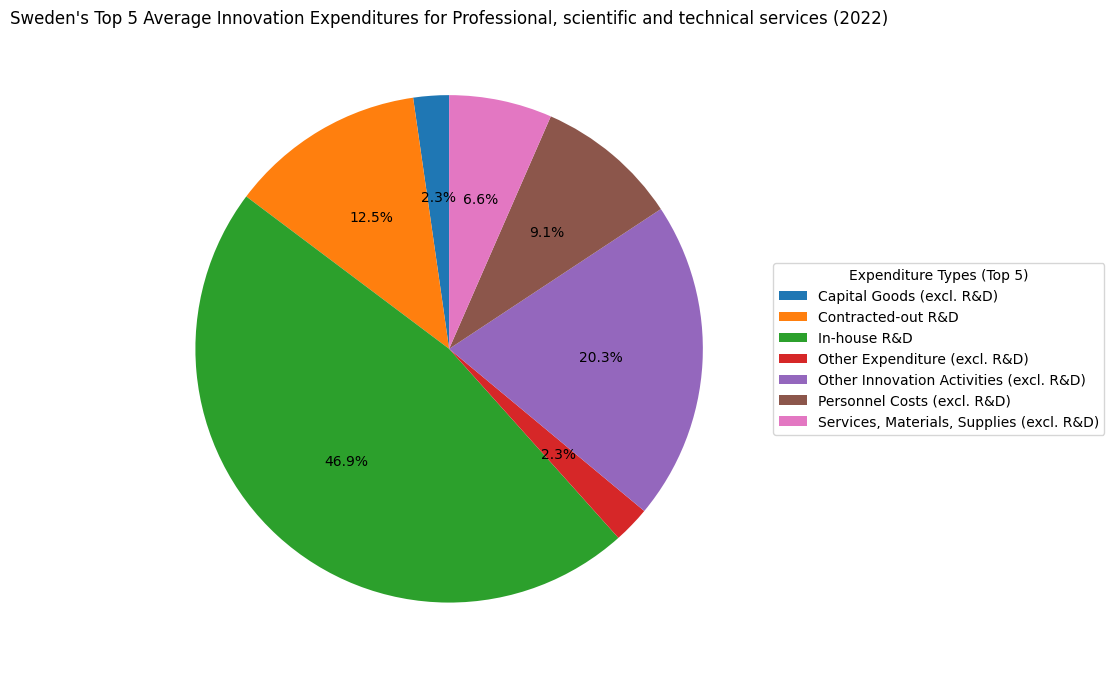

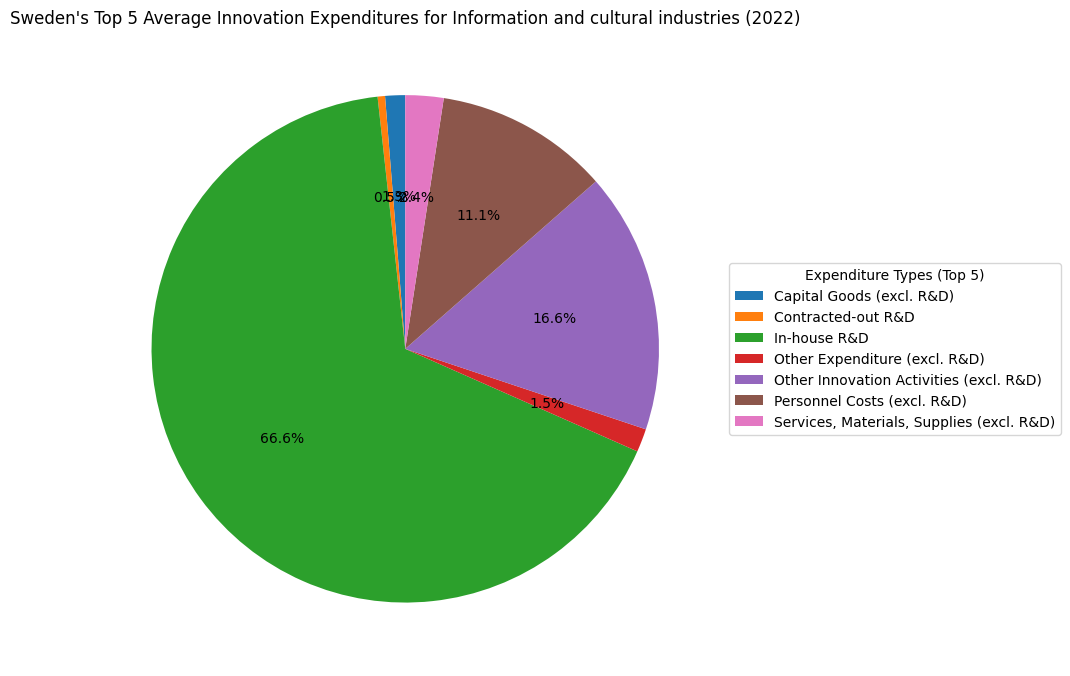

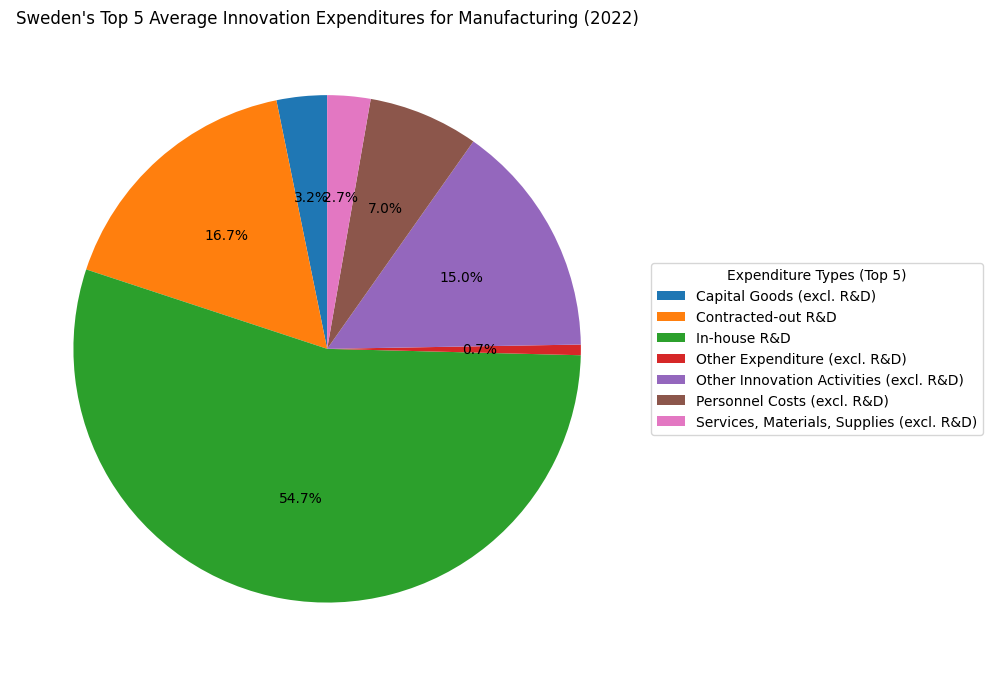

In [25]:
# 2. Sweden's omposition of innovation expenditures for selected sectors (pie charts)

selected_sectors_avg = ['Professional, scientific and technical services',
                        'Information and cultural industries',
                        'Manufacturing']
selected_data_avg = data_avg_2022[data_avg_2022['Sector_Group'].isin(selected_sectors_avg)].set_index('Sector_Group')

# Remove 'Total_Sector_Innovation_Expenditure' column for pie chart plot
selected_data_decomposed_avg = selected_data_avg.drop(columns=['Total_Sector_Innovation_Expenditure'])

# Plot pie charts for each selected sector
for sector in selected_sectors_avg:
    plt.figure(figsize=(10, 10))
    expenditures = selected_data_decomposed_avg.loc[sector].head(5)
    wedges, texts, autotexts = plt.pie(
        expenditures,
        labels=None,  # Hide labels on the chart itself
        autopct='%1.1f%%',
        startangle=90
    )
    # Add title
    plt.title(f"Sweden's Top 5 Average Innovation Expenditures for {sector} (2022)")
    # Add a legend
    plt.legend(wedges, expenditures.index, title="Expenditure Types (Top 5)", bbox_to_anchor=(1, 0.5), loc="center left")
    plt.tight_layout()
    plt.show()

In [63]:
# Average Innovation Expenditures for Key Sectors in Sweden 2022
df = expenditures.copy()
with open('S_exp_sector_2022.txt', 'w') as f:
    f.write(df.to_string(index=False))

# 2 . Comparing to Top Innovative Countries

## Top countries on innovation performance

Data: https://www.kaggle.com/datasets/programmerrdai/global-innovation-index-2008-2021/

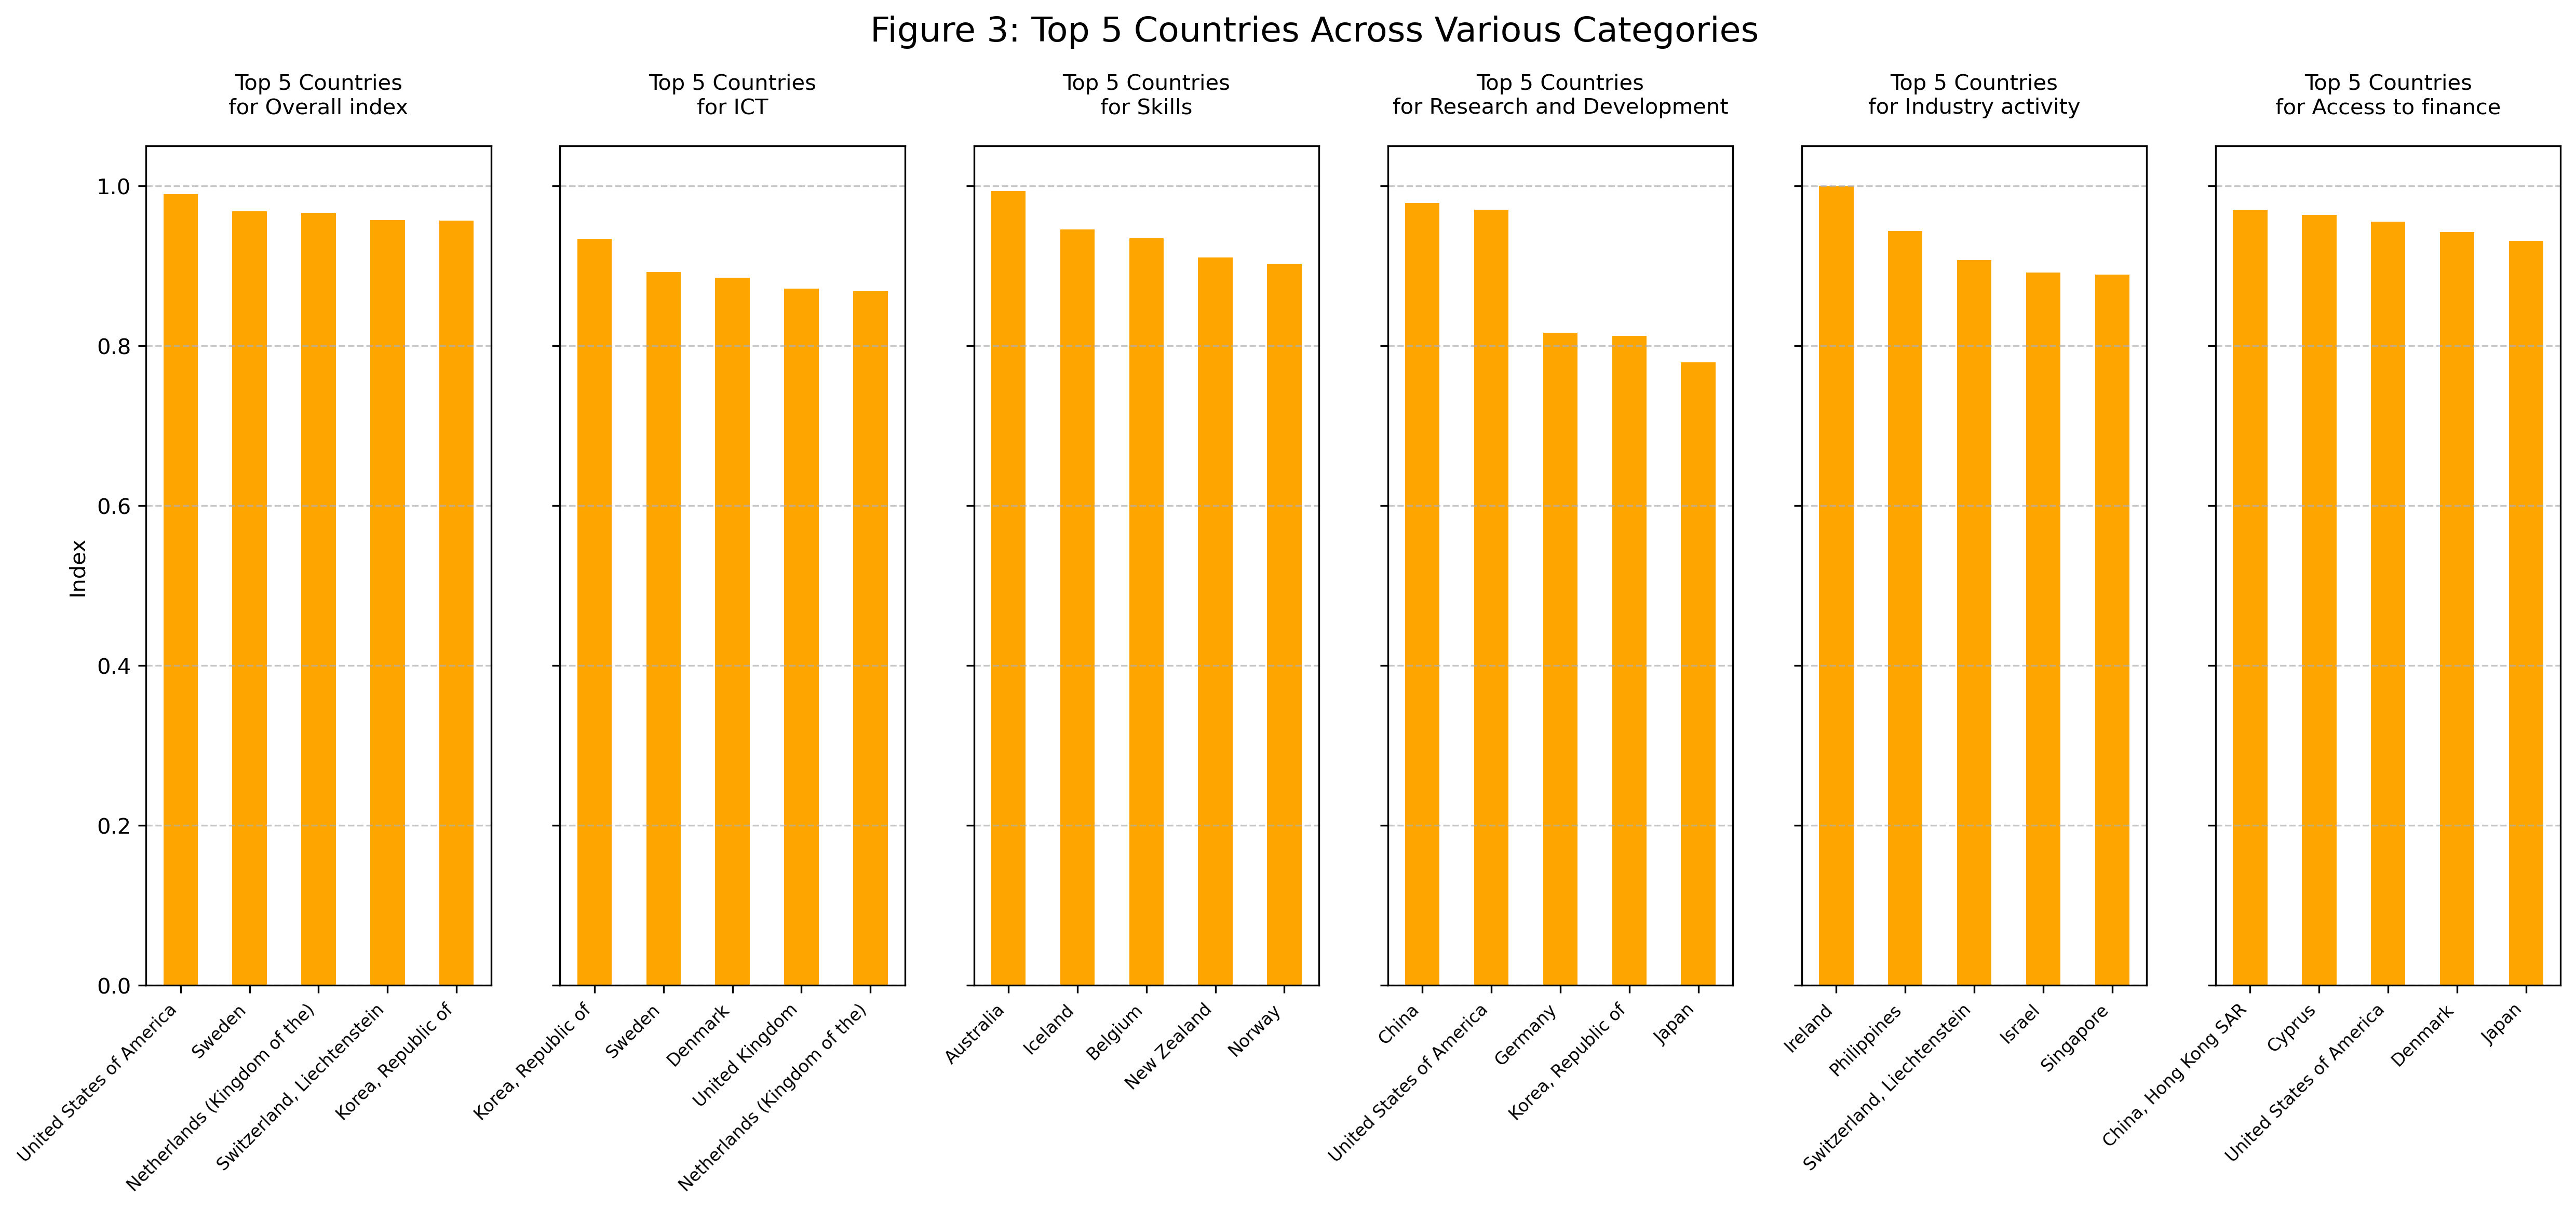

In [ ]:
from IPython.display import Image
Image(filename='Part2_visualization/combined_top_5_countries.png')

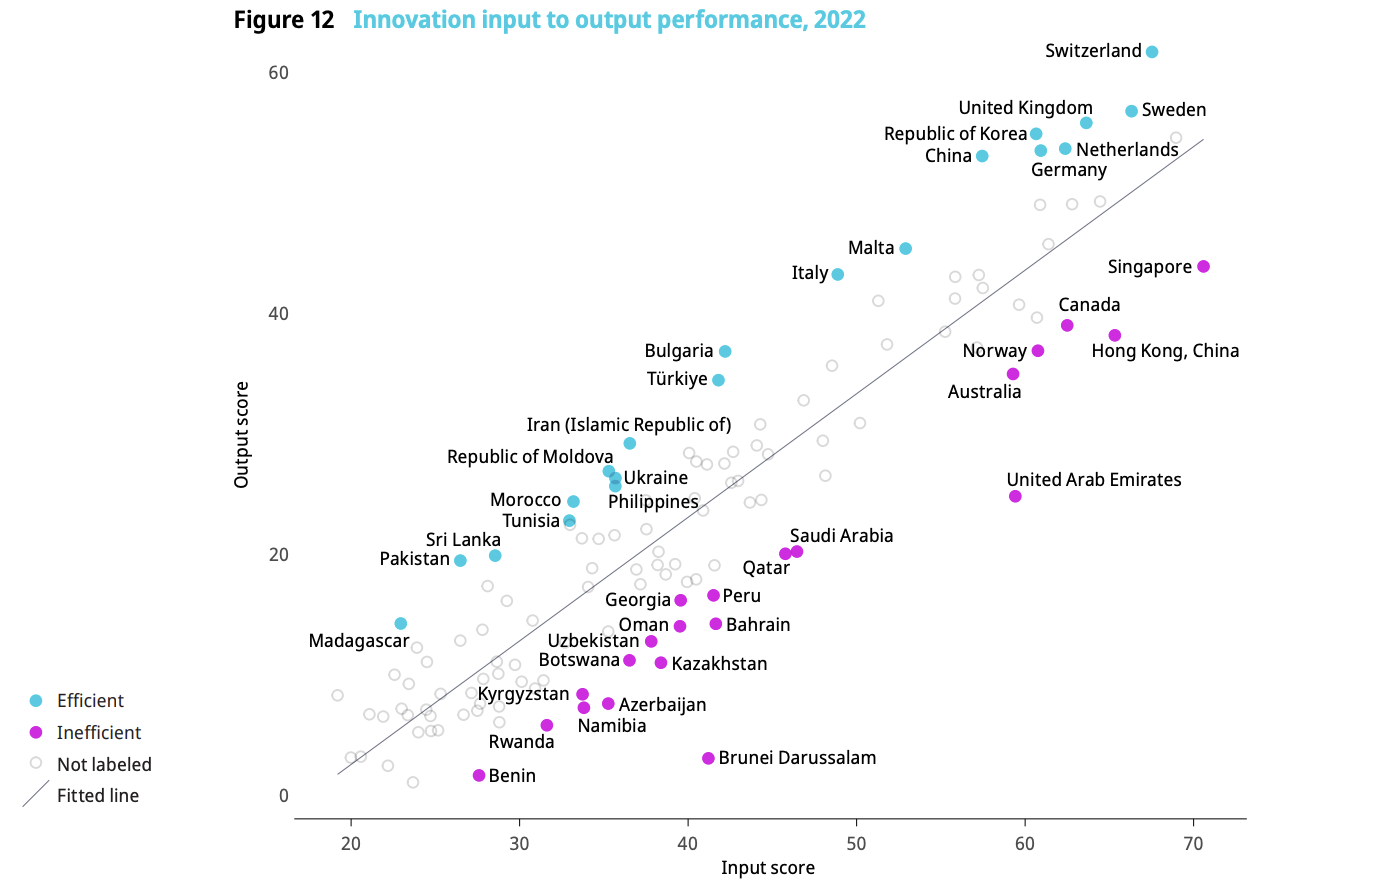

In [ ]:
Image(filename='Part2_visualization/figure12.png')


## Compare US and Canada index categories


Data reference: https://www.census.gov/library/publications/2023/econ/2022-aces-summary.html#tables

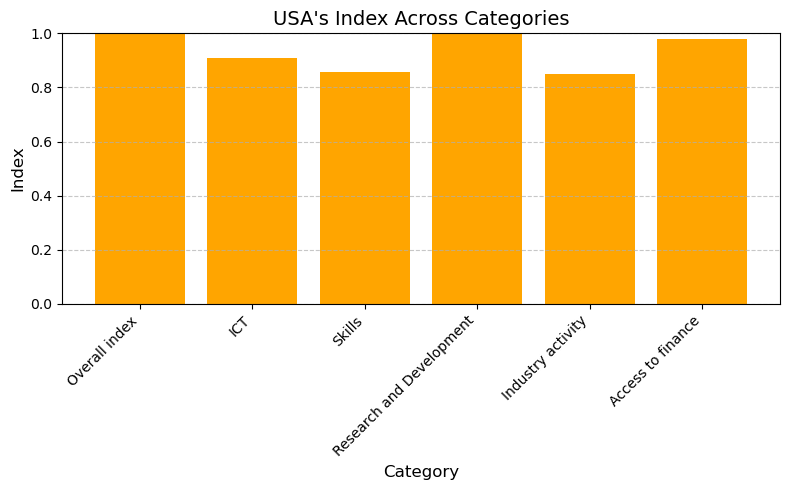

In [ ]:
df = pd.read_csv("Part1 data/US_FTRI_20230628035959.csv")

# Filter data for Canada
canada_data = df[df["Economy Label"] == "United States of America"]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(canada_data["Category Label"], canada_data["Index"], color='orange')

# Add labels and title
plt.title("USA's Index Across Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Index", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

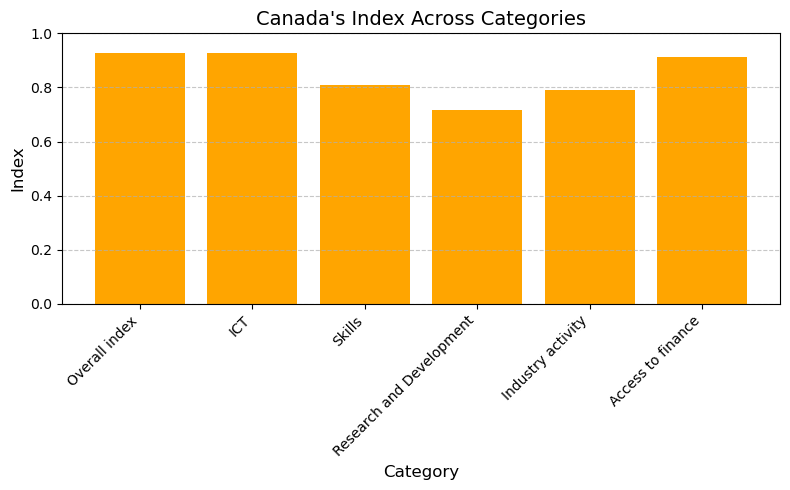

In [ ]:
df = pd.read_csv("Part1 data/US_FTRI_20230628035959.csv")

# Filter data for Canada
canada_data = df[df["Economy Label"] == "Canada"]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(canada_data["Category Label"], canada_data["Index"], color='orange')

# Add labels and title
plt.title("Canada's Index Across Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Index", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## US innovation expenditure by sectors



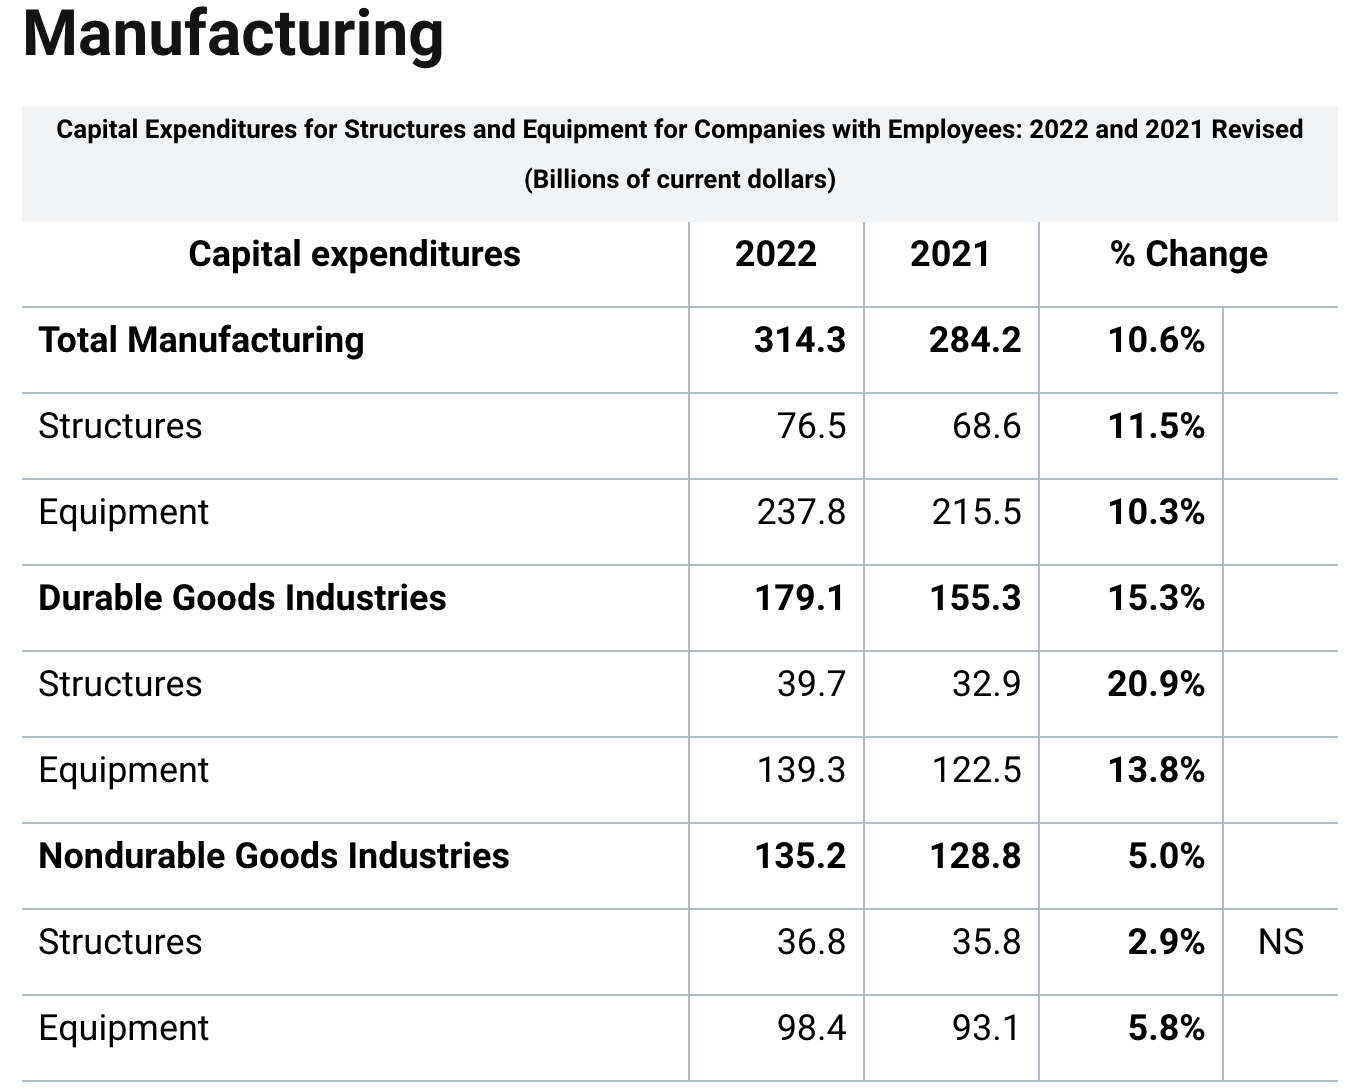

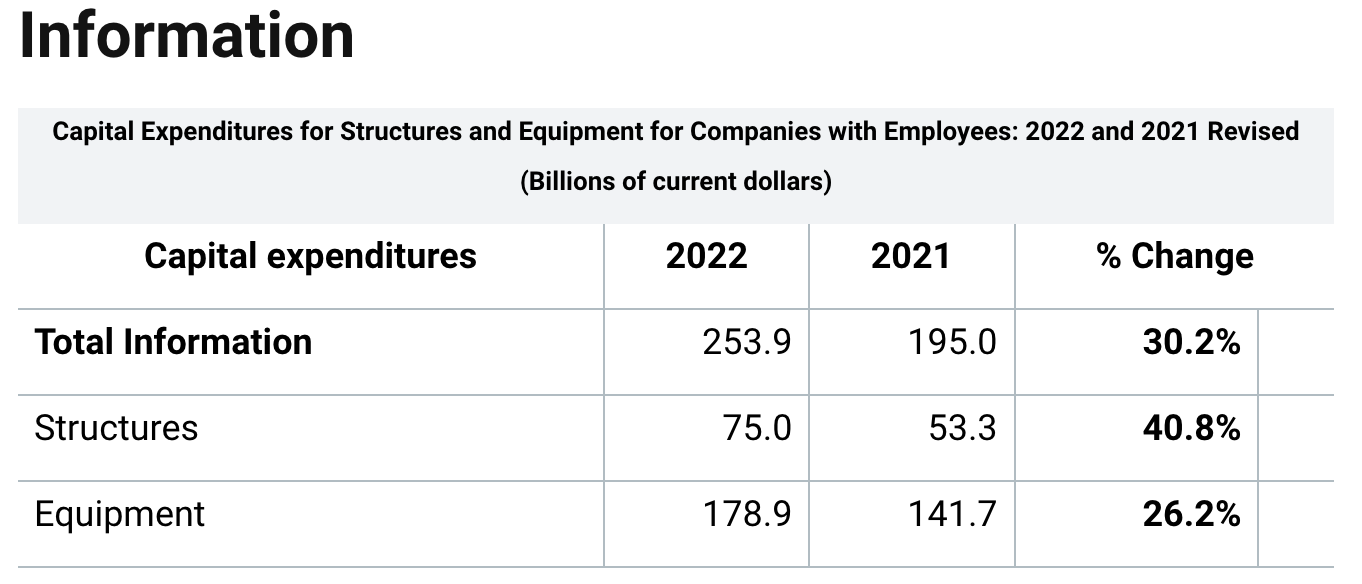

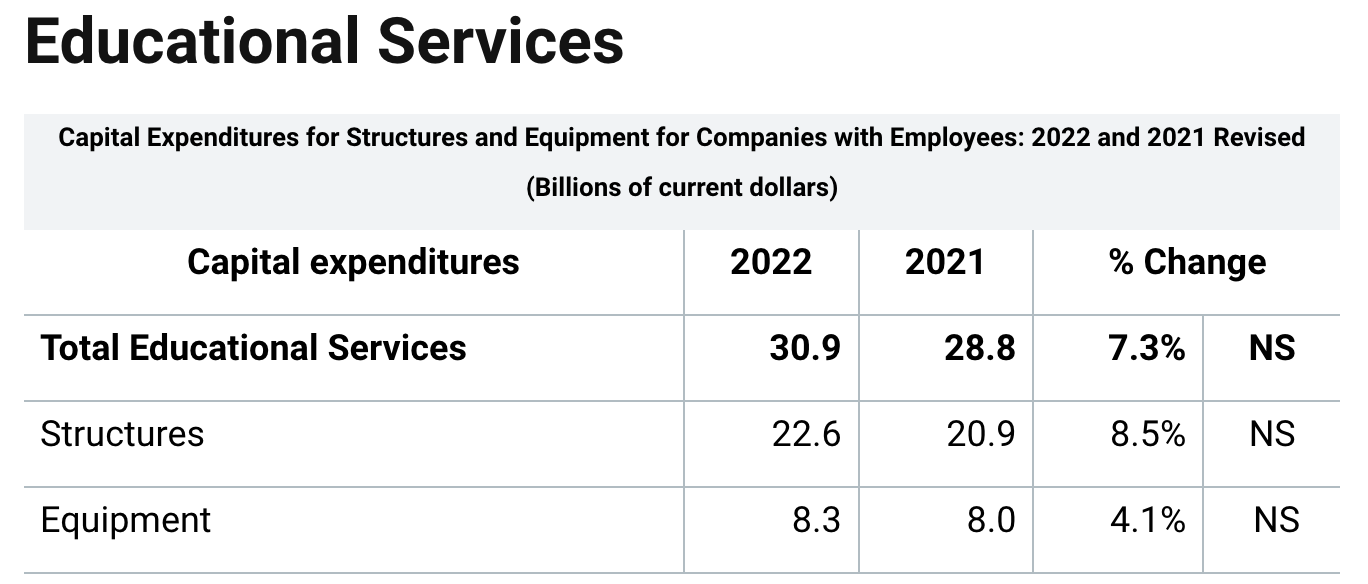

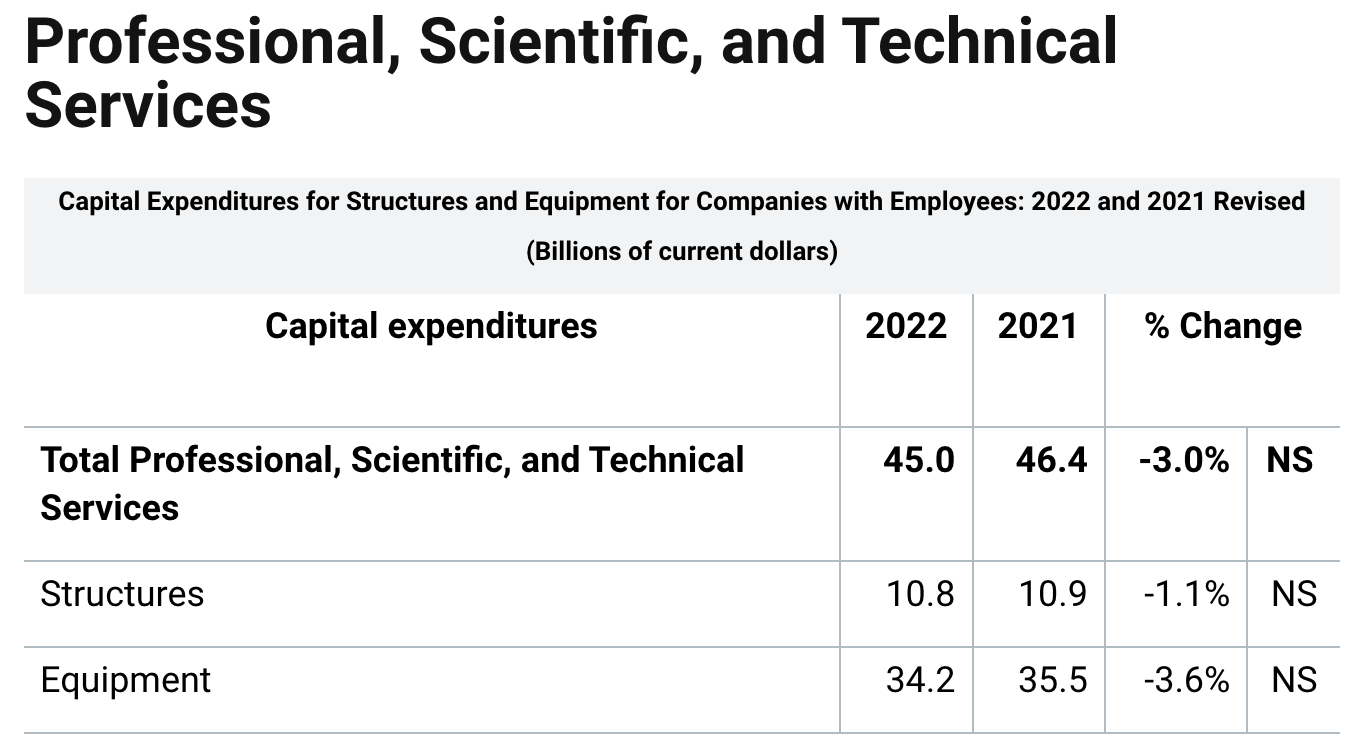

In [ ]:
from IPython.display import Image, display

# File paths for the images
image_paths = [
    "Part2_visualization/usa1.png",
    "Part2_visualization/usa2.png",
    "Part2_visualization/usa3.png",
    "Part2_visualization/usa4.png"
]

# Display all images in one block
images = [Image(filename=path) for path in image_paths]
display(*images)


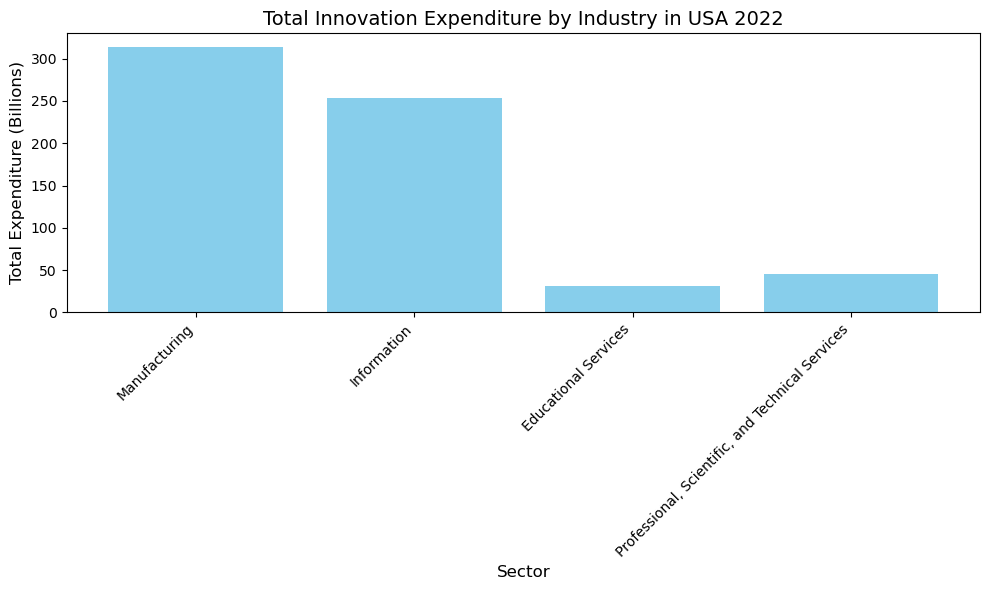

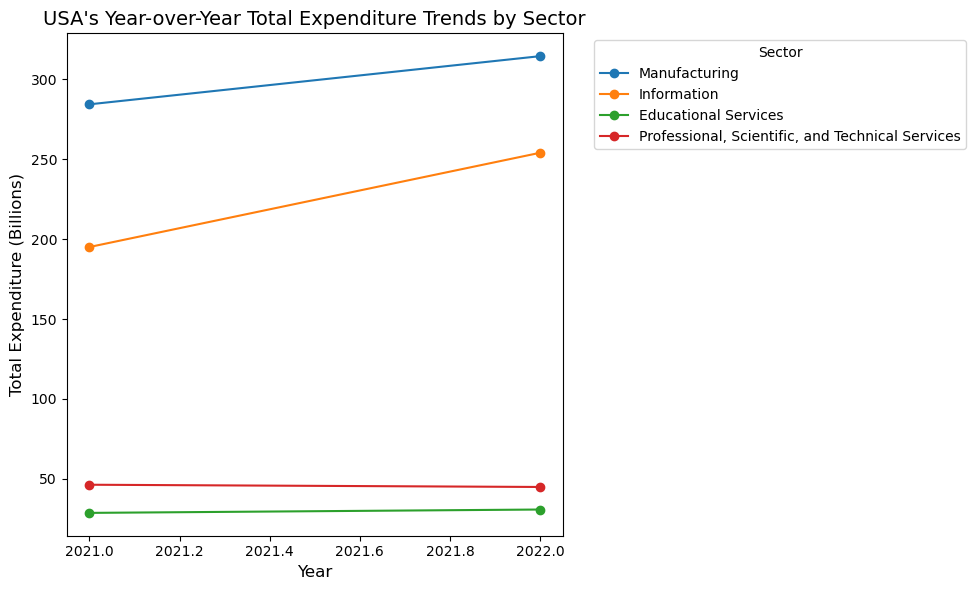

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the tables
data = {
    "Sector": [
        "Manufacturing", "Manufacturing", "Information", "Information",
        "Educational Services", "Educational Services",
        "Professional, Scientific, and Technical Services",
        "Professional, Scientific, and Technical Services"
    ],
    "Year": [2022, 2021, 2022, 2021, 2022, 2021, 2022, 2021],
    "Total Expenditure (Billions)": [314.3, 284.2, 253.9, 195.0, 30.9, 28.8, 45.0, 46.4],
    "Structures (Billions)": [76.5, 68.6, 75.0, 53.3, 22.6, 20.9, 10.8, 10.9],
    "Equipment (Billions)": [237.8, 215.5, 178.9, 141.7, 8.3, 8.0, 34.2, 35.5],
    "% Change": ["10.6%", "", "30.2%", "", "7.3%", "", "-3.0%", ""]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Bar chart: Total expenditure by sector (2022)
df_2022 = df[df["Year"] == 2022]
plt.figure(figsize=(10, 6))
plt.bar(df_2022["Sector"], df_2022["Total Expenditure (Billions)"], color="skyblue")
plt.title("Total Innovation Expenditure by Industry in USA 2022", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Total Expenditure (Billions)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Line plot: Year-over-year total expenditure trends
plt.figure(figsize=(10, 6))
for sector in df["Sector"].unique():
    sector_data = df[df["Sector"] == sector]
    plt.plot(sector_data["Year"], sector_data["Total Expenditure (Billions)"], marker="o", label=sector)

plt.title("USA's Year-over-Year Total Expenditure Trends by Sector", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Expenditure (Billions)", fontsize=12)
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# 3 . Ask GPT for recommendations on Canada's innovation strategy